<a href="https://colab.research.google.com/github/gvanathip/NLP_CNN/blob/main/GenerateWordCloudWordCount_from_upload_TextFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload data file (.xlsx only)

In [39]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  df = pd.read_excel(fn)
  print(df)

Saving 65-food.xlsx to 65-food.xlsx
                                                Detail
0    ... SHIDA VITA-C  ชิดะ วิต้าซี วิตามินซีไฮโดส....
1    ... กลูต้าอาโมนิ ผิวสดใส ไม่โทรม ลดรอยดำ...อาโ...
2    ....Bio Cocoa/ Matcha/Tea malt/ Coffee mix khu...
3    ...“Peacha” ชาผอมลดพุง หอมสดชื่นอร่อย ครบจบในซ...
4    ...(1 ขวด) ZOM RICH ZU ส้มริชซึ วิตามินซี อาหา...
..                                                 ...
449  ...เอมิสกลูต้าเบอรี่...1 ปุก บรรจุ30แคปซูล...฿...
450  ...ใอเท่มใหม่ ที่ทุกคนต้องลอง‼️...มาในรูปแบบเจ...
451  ...ใอเท่มใหม่ ที่ทุกคนต้องลอง‼️...มาในรูปแบบเจ...
452  ...เฮอบาไลฟ์ นิวทริชั่น โปรตีน ดริ้งค์ มิกซ์ H...
453                                        Grand Total

[454 rows x 1 columns]


## Upload THAI font file (.ttf only)

http://www.f0nt.com/release/th-sarabun-new/

In [40]:
uploaded = files.upload()

Saving THSarabunNew.ttf to THSarabunNew.ttf


In [48]:
for fn in uploaded.keys():
  font_file = fn
print(font_file)

THSarabunNew.ttf


# Wait for processing

In [41]:
text = df[df.columns[0]].str.cat(sep=' ')

In [42]:
text

'... SHIDA VITA-C  ชิดะ วิต้าซี วิตามินซีไฮโดส...วิตามินซี ชนิดผงชงดื่ม 1 ช้อน เทียบเท่า วิตามินซี 6 ขวด...ชงดื่มง่าย สะดวก ละลายเร็ว ไร้น้ำตาล...1.ช่วยเก็บกักความชุ่มชื้นไว้บนผิวหนัง ได้มากกว่าปกติหลายเท่า ส่งผลให้ผิวหน้าดูอ่อนกว่าวัย เนียนเรียบขึ้น ริ้วรอยลดลง มีความยืดหยุ่น นุ่มนวลเมื่อสัมผัส อันเกิดจากผิวที่ได้รับความชุ่มชื่นที่เพียงพอ...2.ช่วยเรื่องการสมานของผิว และฟื้นฟูผิวได้เร็วยิ่งขึ้น ช่วยในการรักษาอาการบาดเจ็บของเซลล์ผิวหนัง ให้ฟื้นตัวได้เร็วกว่าเดิมถึง 80%...3.ช่วยทำให้ผิวดูเต่งตึง มีชีวิตชีวา ไฮยาลูรอนิคจะไปช่วยเพิ่มการนำสารอาหารเข้าสู่เซลล์ผิว ในส่วนที่ไม่ได้ติดต่อกับเส้นเลือดโดยตรง...4.ช่วยให้เกิดการกำจัดของเสีย จากเซลล์ผิว ลดลงไปเรื่อย ๆ เมื่ออายุเข้าสู่วัยกลางคน ตั้งแต่ 30 ปีเป็นต้นไป จะส่งผลกระทบต่อผิวโดยตรง จะสูญเสียความชุ่มชื่น ผิวแห้งลงและขาดความยืดหยุ่น...วิธีทาน...: ทานง่าย เเค่วันละ 1 ช้อนชา ชงกับน้ำเย็นหรือน้ำปกติเเนะนำให้ทานหลังอาหาร ไม่ควรทานช่วงท้องว่างนะคะ...1 กระปุก ขนาด 50 g. ( ทานได้ประมาณ 15 วัน )...\n Page ID : 100778432039059\n หมายเลขโทรศัพท์ ๐๙๘-๖๔๑

In [43]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from pythainlp.tokenize import word_tokenize
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
import matplotlib.pyplot as plt

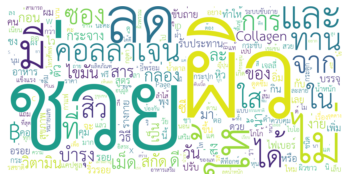

In [51]:
wordcloud = WordCloud(font_path=font_file,
                      stopwords = ' '.join(thai_stopwords()),
                      background_color="white",
                      width=2048, # กว้าง
                      height=1024, # ยาว
                      collocations=False,
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+"
                      ).generate(' '.join(word_tokenize(text)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
from collections import Counter
counts = Counter(word_tokenize(text))
print(counts)

Counter({' ': 17079, '...': 3225, 'ผิว': 890, 'ช่วย': 860, '1': 746, 'ไม่': 687, 'มี': 588, 'ให้': 586, 'ลด': 540, 'และ': 513, '-': 495, 'คอลลาเจน': 490, 'ได้': 486, 'ทาน': 481, 'จาก': 466, 'ที่': 441, '..': 438, 'การ': 378, 'ใน': 371, 'ซอง': 368, 'ใส': 355, 'สิว': 323, ':': 319, 'บำรุง': 311, 'เม็ด': 294, 'ดี': 285, 'กล่อง': 273, '.': 271, 'ของ': 260, '2': 255, 'ละ': 250, '(': 248, 'สาร': 233, 'วัน': 227, '\n': 220, 'ไขมัน': 220, 'สกัด': 216, 'ซี': 197, 'วิตามิน': 197, '...ลด': 176, 'ง่าย': 172, 'มา': 169, 'น้ำ': 168, 'เป็น': 167, 'ล': 162, 'ก่อน': 161, 'กระจ่าง': 160, '10': 154, 'น.': 150, 'ส่ง': 149, 'วิธี': 147, '/': 147, 'ตัว': 145, 'รับประทาน': 144, 'อิ่ม': 141, '30': 139, 'อาหาร': 138, 'บรรจุ': 138, 'หิว': 137, 'ขับถ่าย': 135, '...฿': 134, '  ': 133, 'หรือ': 131, 'ร่างกาย': 130, 'พุง': 129, 'Collagen': 129, 'รอย': 128, 'กิน': 127, 'ไว': 127, 'ด้วย': 125, 'ชง': 123, 'อร่อย': 123, 'เพิ่ม': 122, 'ไฟเบอร์': 122, 'จะ': 121, 'นี้': 121, 'ริ้วรอย': 120, 'เลย': 120, 'สุขภาพ': 120, 'ก.':

In [66]:
word_count = pd.Series(word_tokenize(text)).value_counts().sort_values(ascending=False)
word_count = word_count.to_frame().reset_index().rename(columns={"index": "word", 0: "count"})

In [68]:
word_count.to_csv('word_count.csv')
files.download('word_count.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>